# Data Science Phase-1 : 
## Exploratory Data Analysis(EDA) - Terrorism

In [93]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
import warnings
warnings.filterwarnings('ignore')

### Data Load: Load data into a dataframe

In [95]:
df1 = pd.read_csv("terrorism.csv")
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [96]:
df1.shape

(181691, 135)

In [97]:
df1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [98]:
df1.columns.nunique()

135

In [99]:
df1.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [100]:
df2=df1[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [101]:
df2.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [103]:
df2.shape

(181691, 18)

# Data Cleaning: Handle NA values

In [104]:
df2=df2.drop(['latitude','longitude','Summary'],axis='columns')
df2.head()

,Year,Month,Day,Country,state,Region,city,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


In [105]:
df2.isna().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
AttackType          0
Killed          10313
Wounded         16311
Target            636
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [106]:
df2['state']=df2['state'].fillna('Others')

In [107]:
df2['city']=df2['city'].replace('Unknown','others')

In [108]:
df3=df2.dropna()
df3.isna().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
AttackType     0
Killed         0
Wounded        0
Target         0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

# Data Exploration

In [109]:
#year-wise terrorist attacks from 1970 to 2017
df3['Year'].value_counts().sort_index()

1970     222
1971     111
1972      40
1973      25
1974      40
1975      26
1976      30
1977      18
1978      41
1979      13
1980      23
1981      22
1982      27
1983      20
1984      47
1985      26
1986      38
1987      27
1988      28
1989      29
1990      27
1991      28
1992      28
1994      34
1995      25
1996      13
1997      21
1998     777
1999    1280
2000    1637
2001    1793
2002    1238
2003    1154
2004    1036
2005    1805
2006    2462
2007    2921
2008    4378
2009    4458
2010    4729
2011    4896
2012    1896
2013    2403
2014    1906
2015    1801
2016    1702
2017    1675
Name: Year, dtype: int64

In [110]:
#Top 10 affected countries
df3['Country'].value_counts().head(10)

Iraq             8869
India            5432
Pakistan         4909
Afghanistan      3222
Philippines      2262
Thailand         1804
Russia           1490
United States    1428
Colombia         1417
Algeria          1371
Name: Country, dtype: int64

In [111]:
#most terrorist attacked state
df3['state'].mode()

0    Baghdad
Name: state, dtype: object

In [112]:
#most terrorist attacked region
df3['Region'].mode()

0    South Asia
Name: Region, dtype: object

In [113]:
#most terrorist attacked city
df3['city'].mode()

0    Baghdad
Name: city, dtype: object

In [114]:
#Top 10 attacking modes
df3['AttackType'].value_counts().head(10)

Bombing/Explosion                      23682
Armed Assault                          11147
Facility/Infrastructure Attack          3751
Hostage Taking (Kidnapping)             3581
Assassination                           3051
Unknown                                 1047
Unarmed Assault                          370
Hostage Taking (Barricade Incident)      203
Hijacking                                144
Name: AttackType, dtype: int64

In [115]:
#most common target of terrorists
df3['Target'].mode()

0    Civilians
Name: Target, dtype: object

In [116]:
#most commonly used weapon
df3['Weapon_type'].mode()

0    Explosives
Name: Weapon_type, dtype: object

In [117]:
df3['AttackType'].unique()

array(['Armed Assault', 'Facility/Infrastructure Attack',
       'Bombing/Explosion', 'Assassination', 'Hijacking',
       'Unarmed Assault', 'Hostage Taking (Kidnapping)',
       'Hostage Taking (Barricade Incident)', 'Unknown'], dtype=object)

# Data Visualization

In [118]:
df3.describe()

,Year,Month,Day,Killed,Wounded
count,46976.000000,46976.000000,46976.000000,46976.000000,46976.000000
mean,2007.913126,6.492954,15.238675,2.425302,4.982438
std,6.482955,3.379523,8.824886,13.174588,59.462100
min,1970.000000,1.000000,0.000000,0.000000,0.000000
25%,2005.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,7.000000,15.000000,0.000000,0.000000
75%,2011.000000,9.000000,23.000000,2.000000,3.000000
max,2017.000000,12.000000,31.000000,1384.000000,8191.000000


<AxesSubplot:>

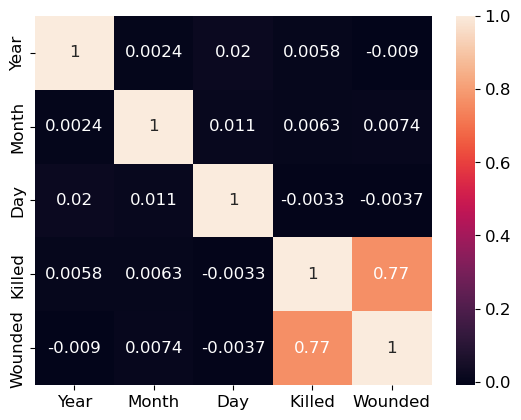

In [119]:
import seaborn as sn
sn.heatmap(df3.corr(),annot=True)

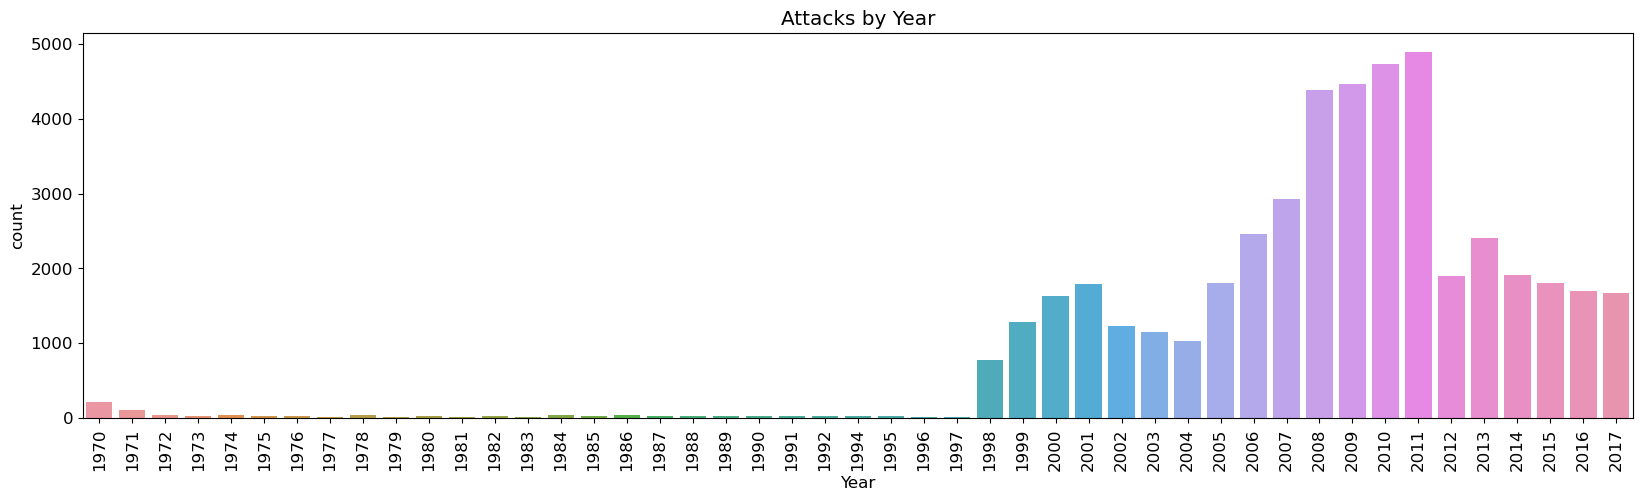

In [129]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sn.countplot(x=df3.Year);

Attacks were low from 1970 to 1997. They were increased after 2007 and it reached maximum in 2011 and then it started decreasing.

In [131]:
#top 5 destructive attacks
df3.sort_values(by="Killed",ascending=False).head()

,Year,Month,Day,Country,state,Region,city,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
73126,2001,9,11,United States,New York,North America,New York City,Hijacking,1384.0,8190.0,Passengers and crew members on American Airlin...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown
73127,2001,9,11,United States,New York,North America,New York City,Hijacking,1383.0,8191.0,Passengers and crew members on United Airlines...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown
133225,2014,6,10,Iraq,Nineveh,Middle East & North Africa,Badush,Armed Assault,670.0,0.0,Badush Prison,Islamic State of Iraq and the Levant (ISIL),Police,Explosives,"The specific motive is unknown; however, sourc..."
179671,2017,10,14,Somalia,Banaadir,Sub-Saharan Africa,Mogadishu,Bombing/Explosion,588.0,316.0,Hotel,Al-Shabaab,Business,Explosives,"The specific motive is unknown; however, sourc..."
76347,2004,3,21,Nepal,Central,South Asia,Dhading district,Armed Assault,518.0,216.0,"Government infrastructure in the town of Bedi,...",Communist Party of Nepal- Maoist (CPN-M),Government (General),Firearms,Unknown


In 2001, Al-Qaida terrorist group hijacked an aeroplane and that attack leads to death of 1384 crew members and passengers.

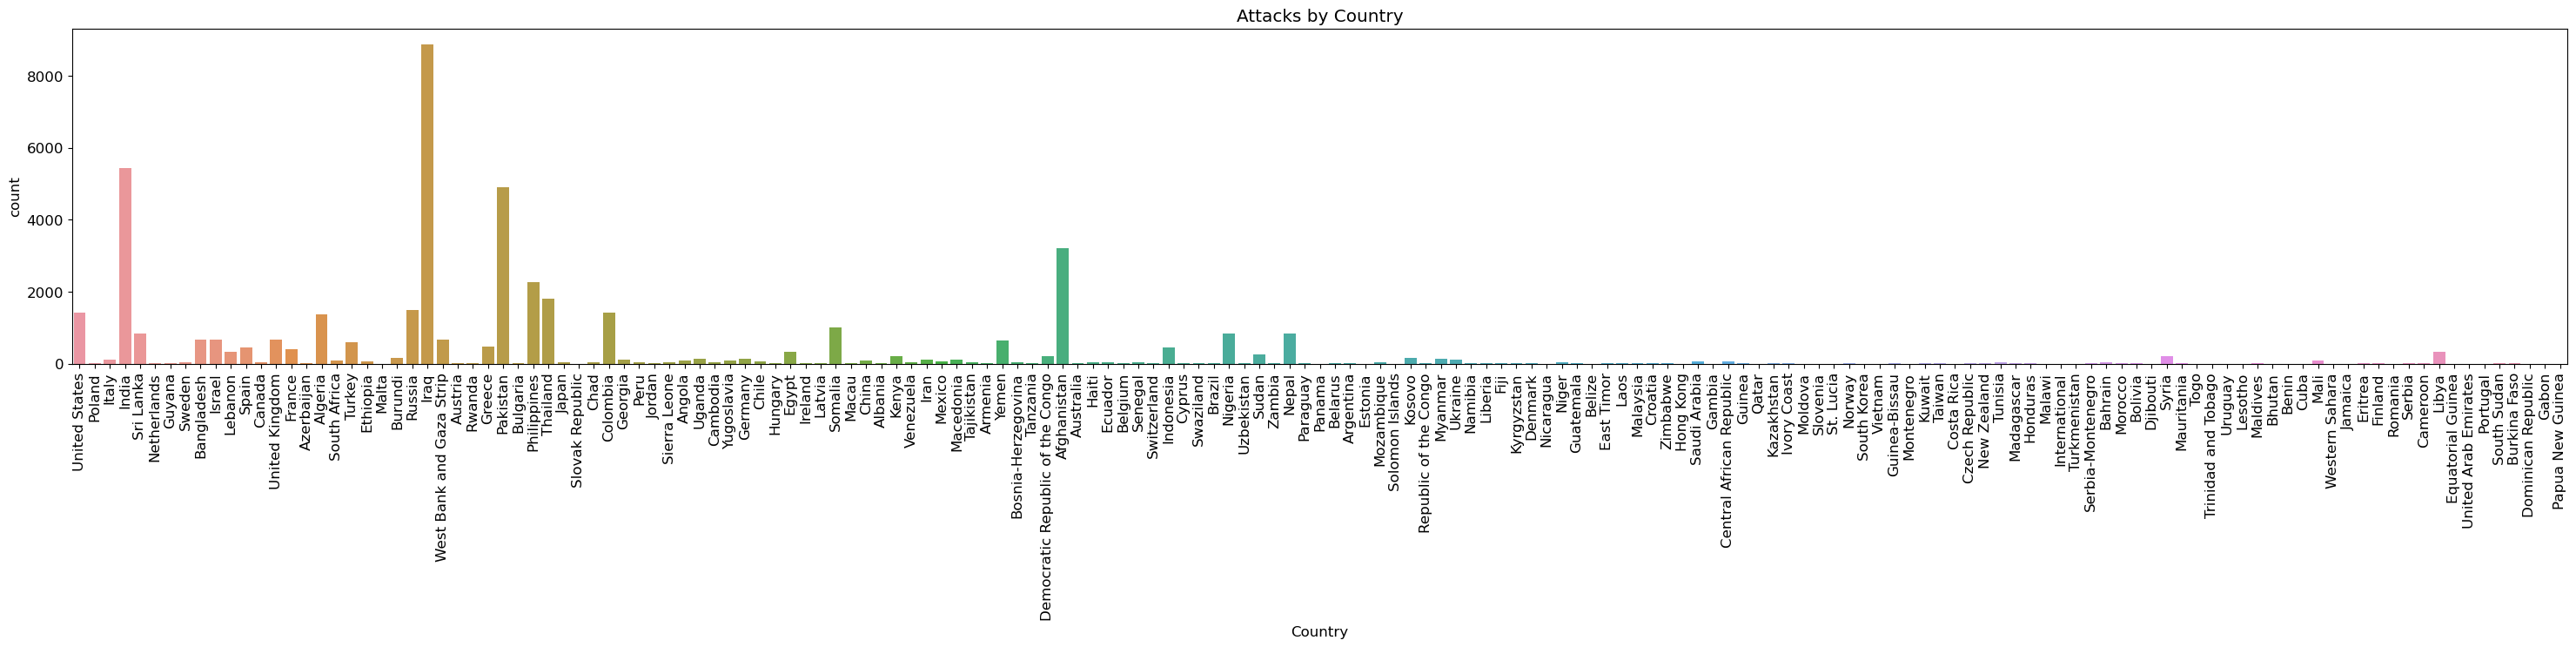

In [120]:
plt.figure(figsize=(37,5))
plt.title('Attacks by Country')
plt.rcParams.update({'font.size':8});
plt.xticks(rotation = 90)
sn.countplot(x=df3.Country);

Iraq was the most terrorist attacked country followed by India with around 6000 attacks.

<AxesSubplot:xlabel='Country', ylabel='Killed'>

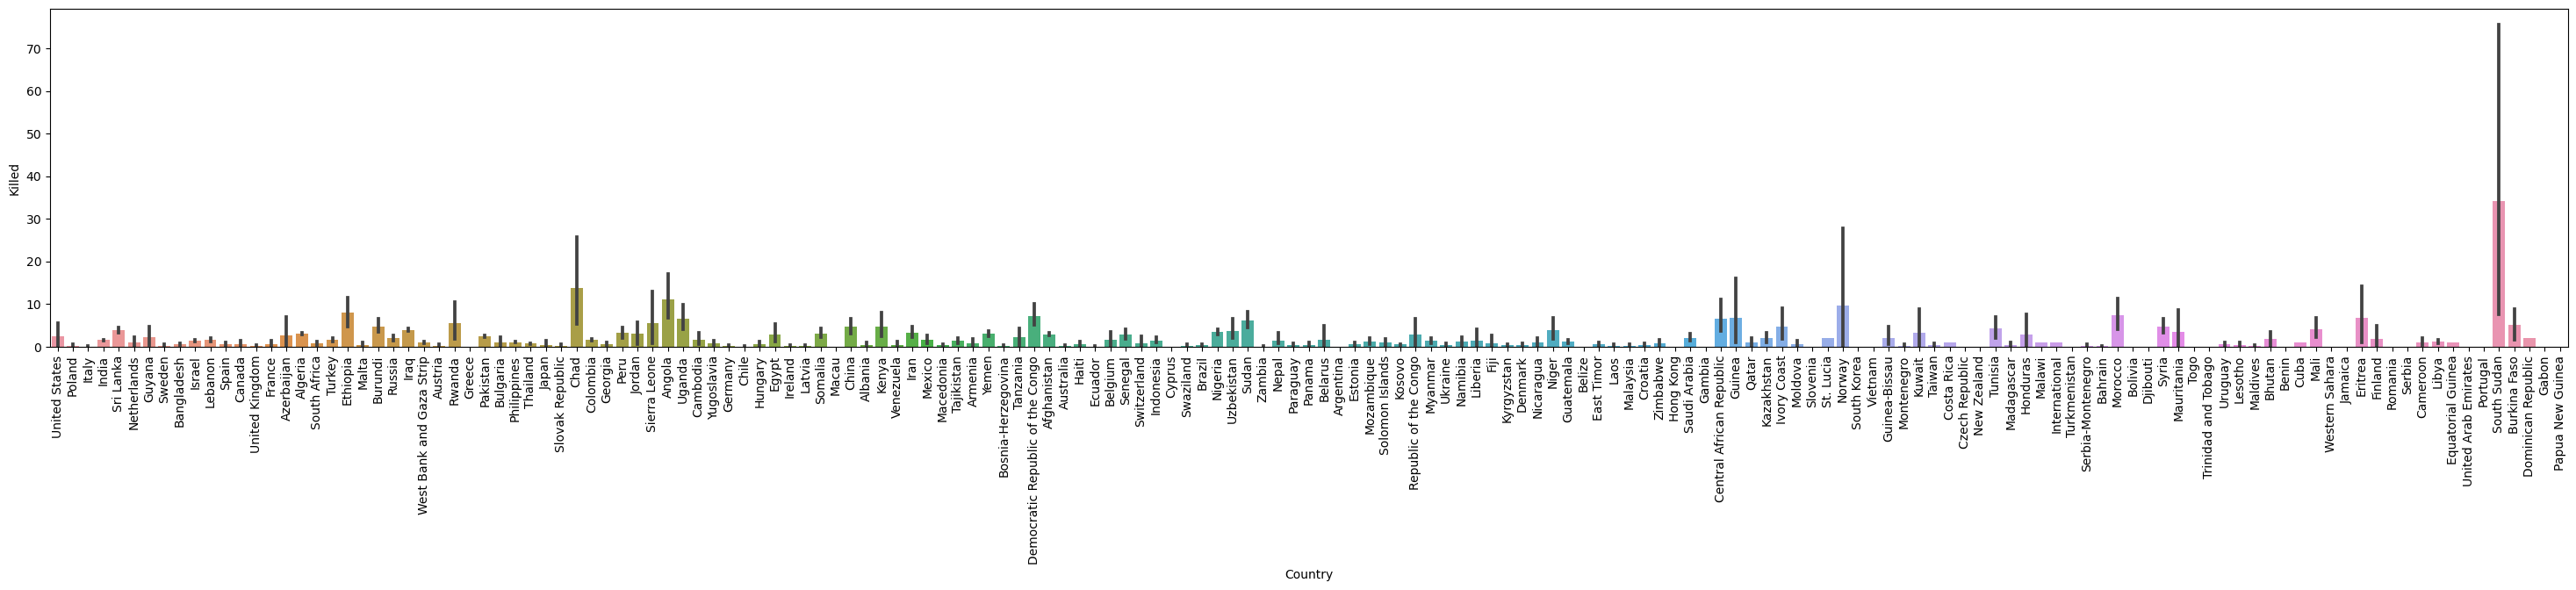

In [153]:
plt.figure(figsize=(37,5))
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
sn.barplot(x=df3.Country,y=df3.Killed)

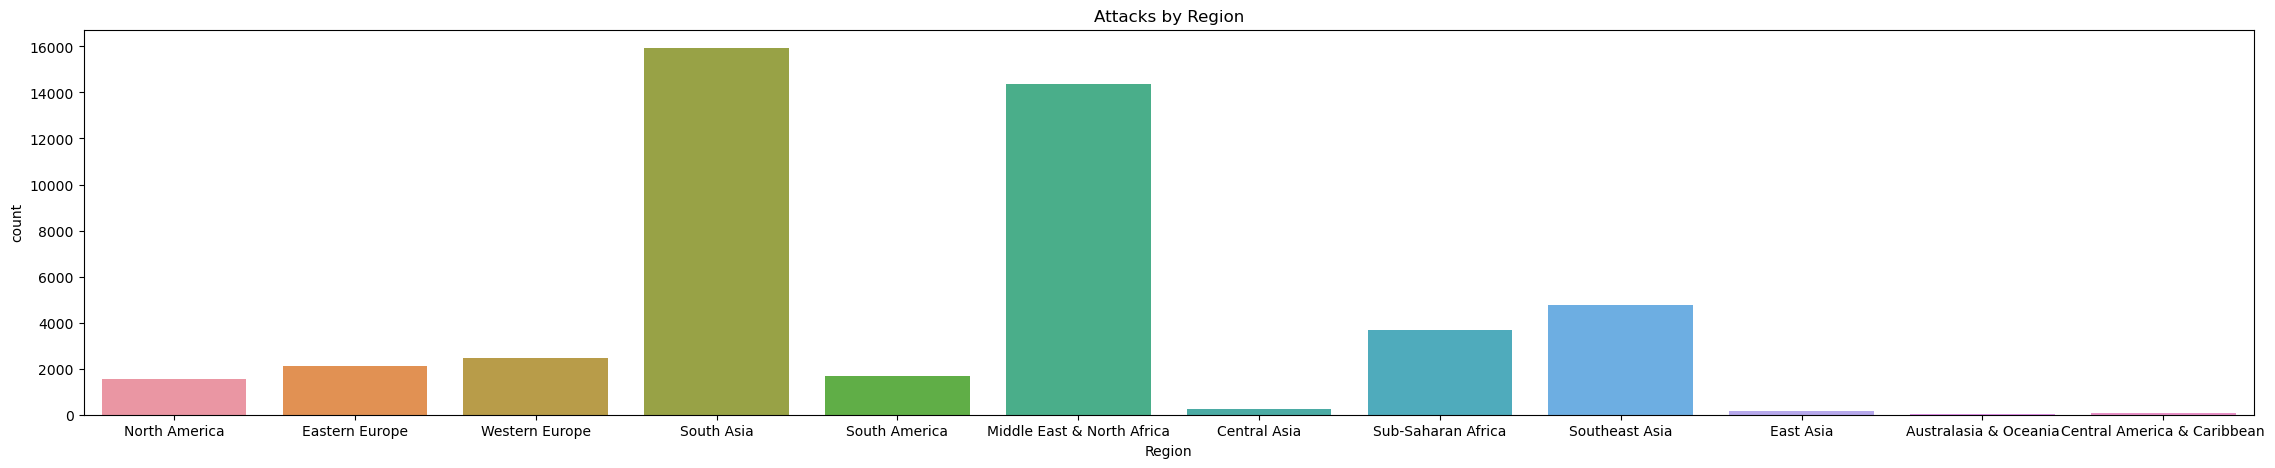

In [122]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 0)
plt.title('Attacks by Region')
sn.countplot(x=df3.Region);

The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.

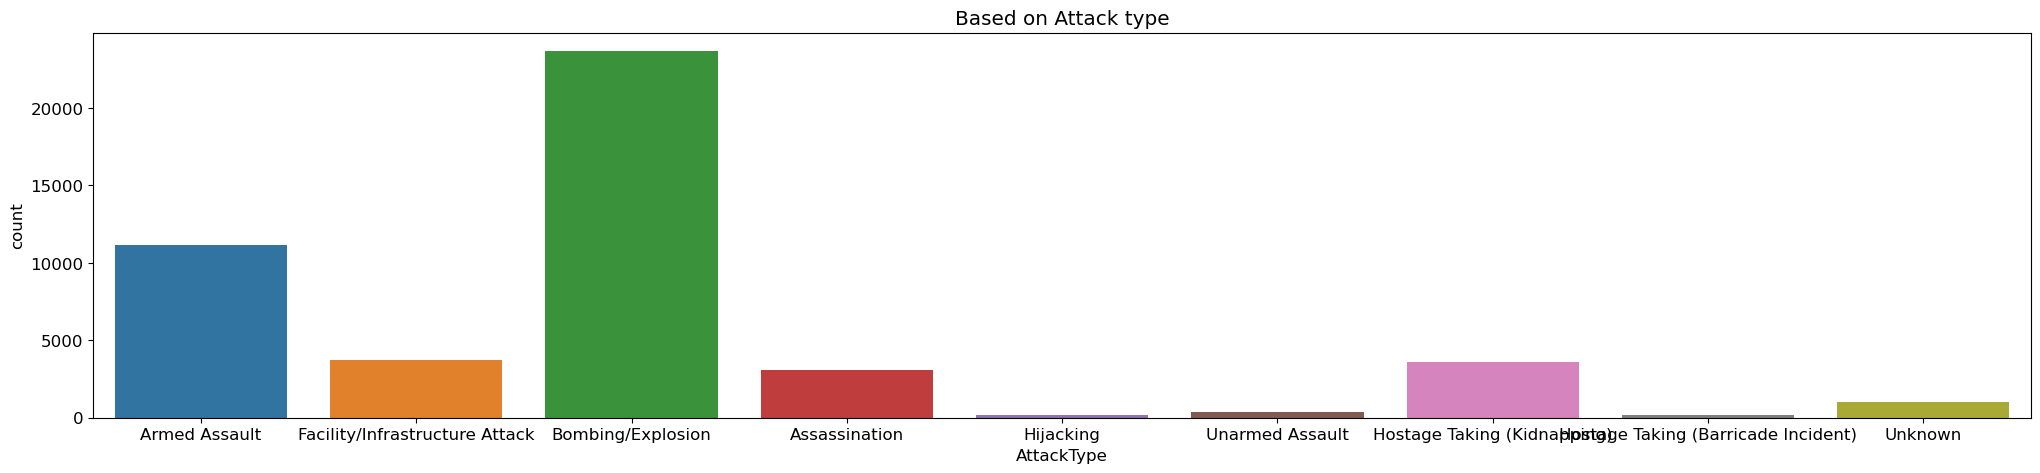

In [123]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sn.countplot(x=df3.AttackType);

Most of the attacks were through explosives and then through firearms

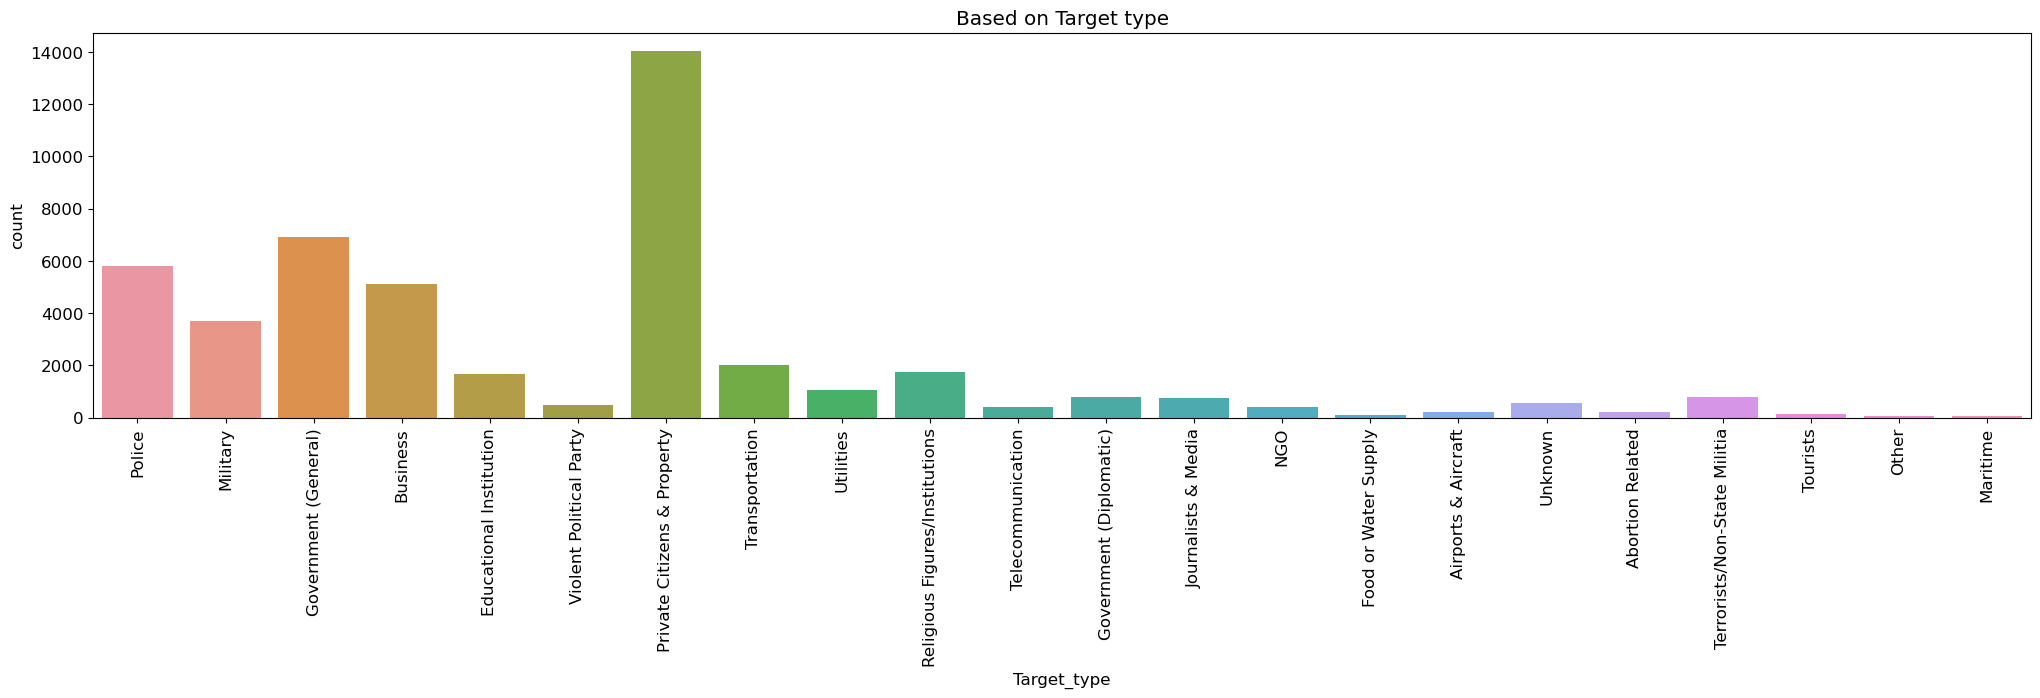

In [124]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 90)
plt.title('Based on Target type')
sn.countplot(x=df3.Target_type);

For most of the attacks, the target is Private Citizens& property and the next Military leads.

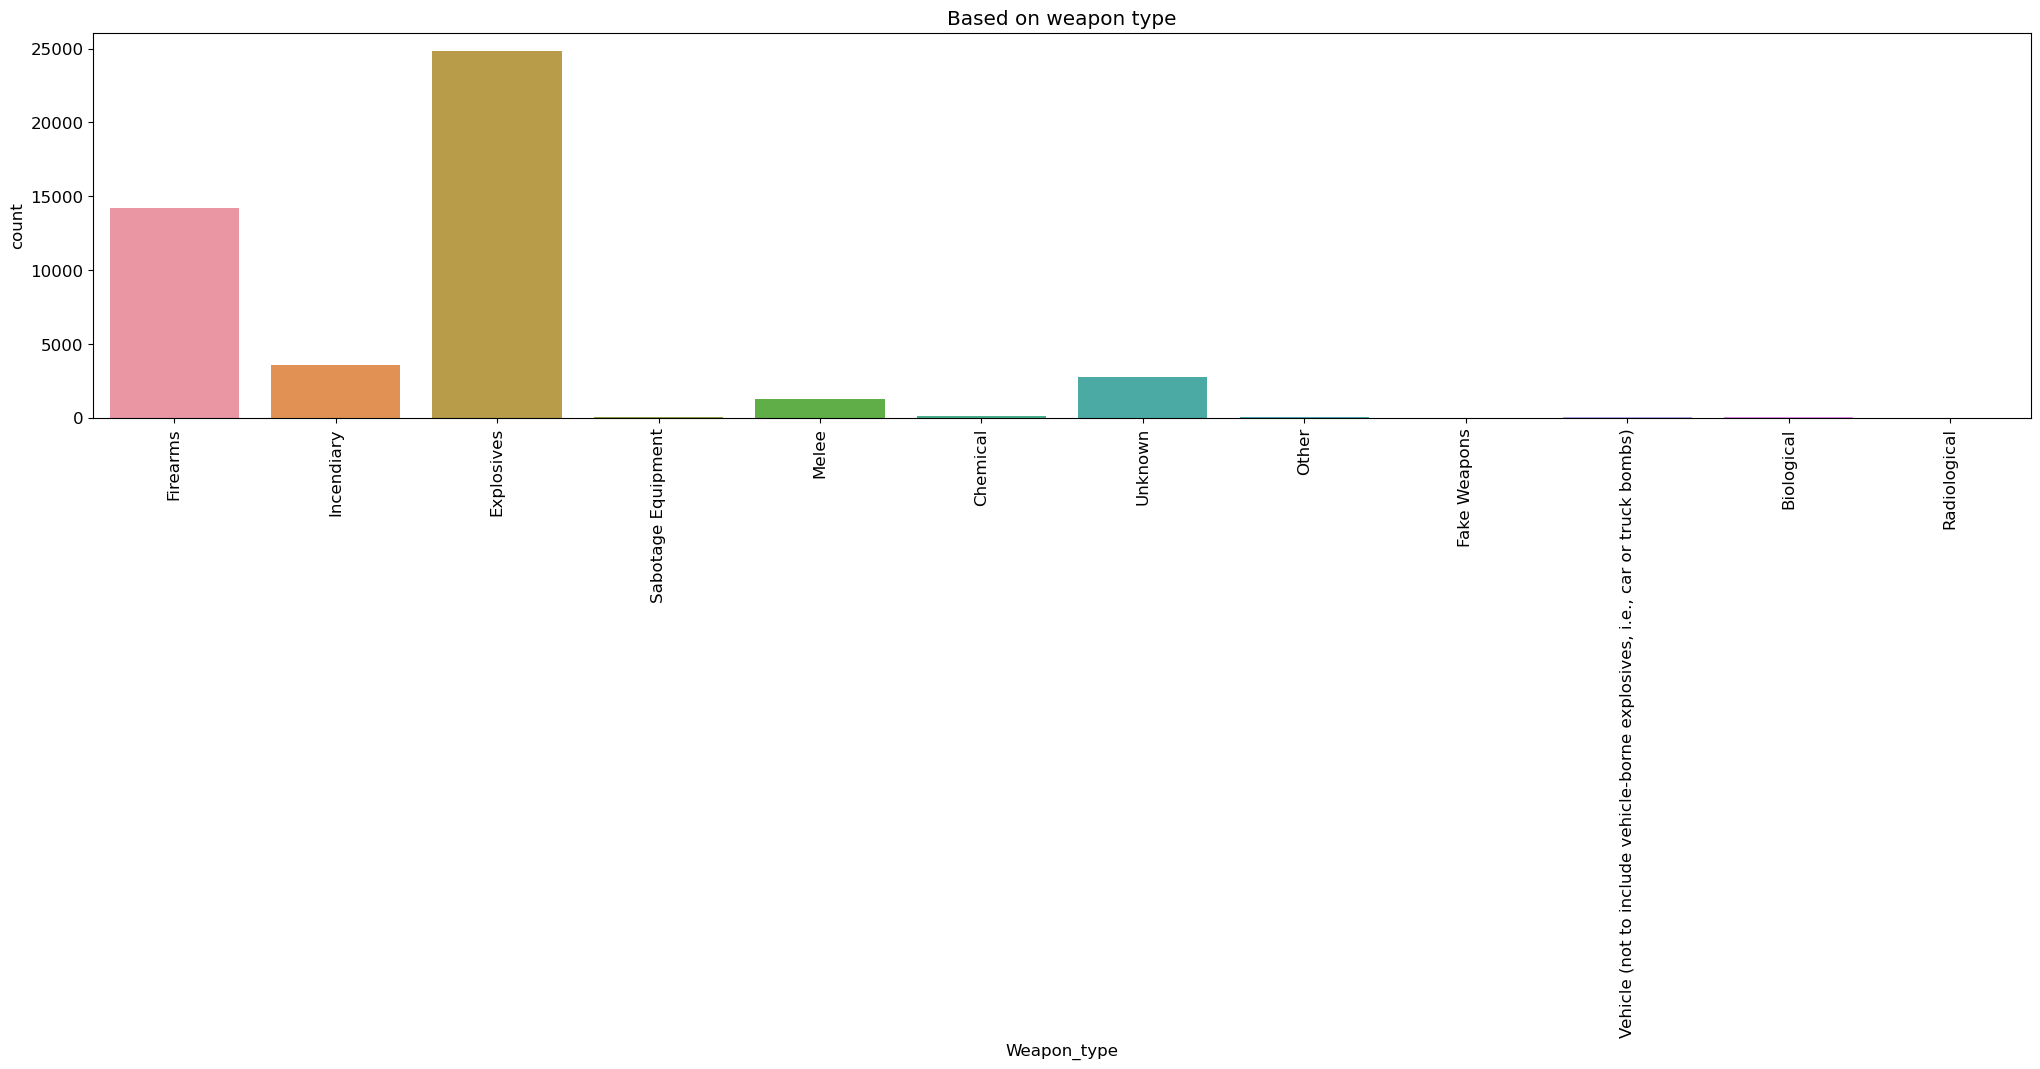

In [125]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 90)
plt.title('Based on weapon type')
sn.countplot(x=df3.Weapon_type);

Most of the attacks were attacked through explosives and then through firearms.

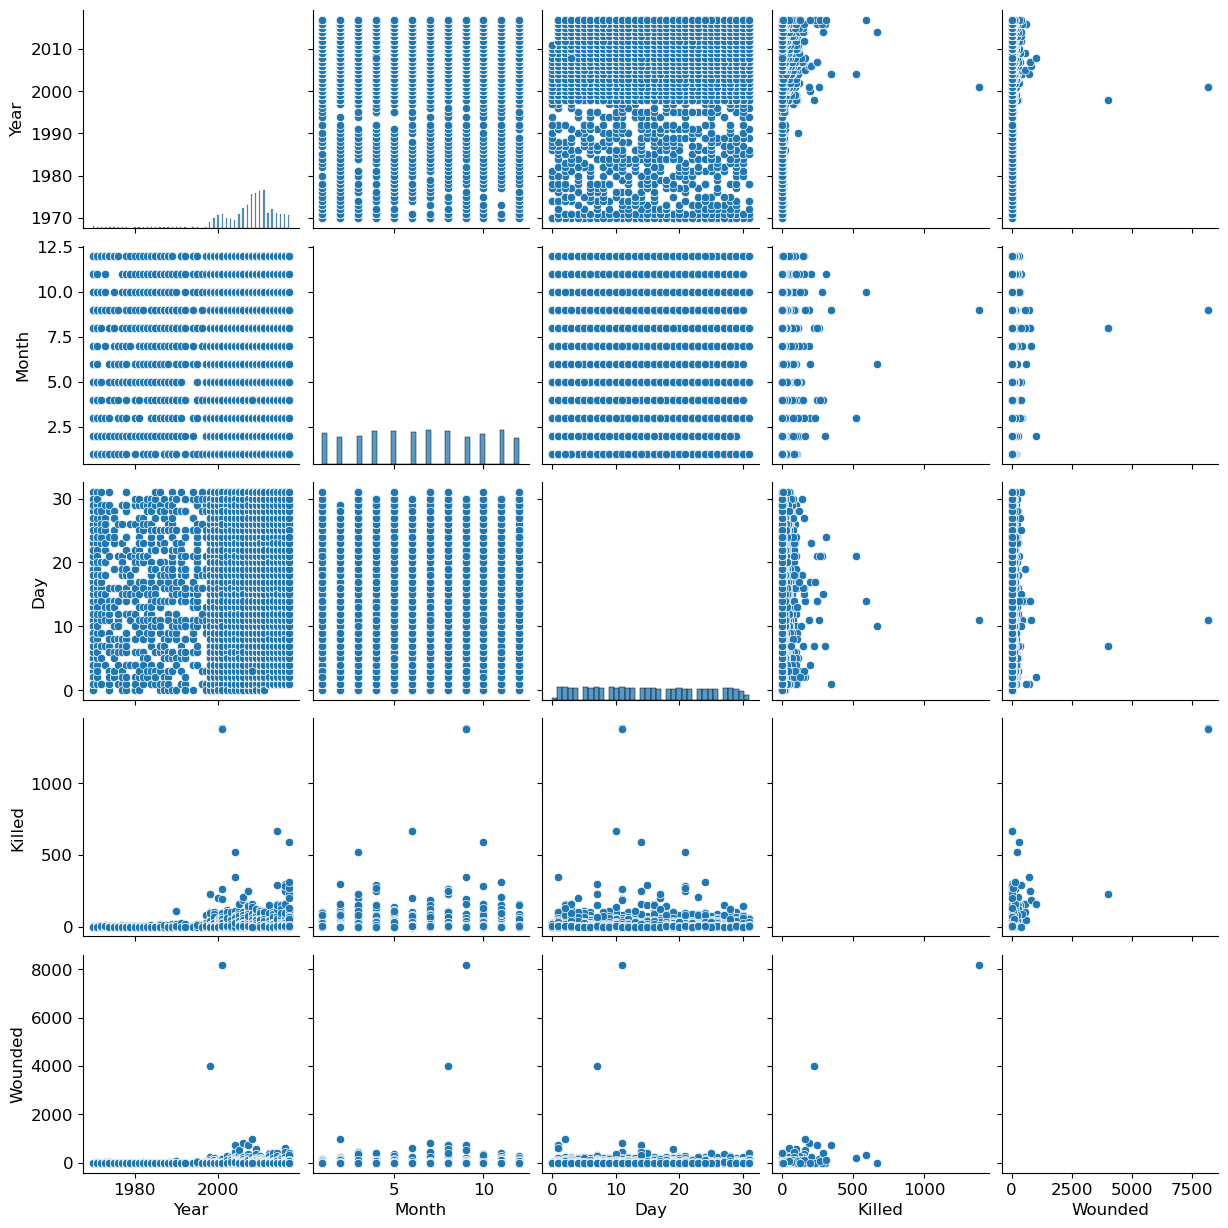

In [127]:
sn.pairplot(df3);

In [150]:
d=df3[['Year','Killed']]
d=d.groupby(by='Year').agg(np.sum)
d

,Killed
Year,
1970,16.0
1971,9.0
1972,6.0
1973,31.0
1974,11.0
1975,9.0
1976,0.0
1977,9.0
1978,9.0


Year 2007 registered most number of deaths due to terrorist attacks.

In [151]:
print("Most Attacked")
print("Country : ",df3['Country'].value_counts().idxmax())
print('Region :',df3['Region'].value_counts().idxmax())
print('Year : ',df3['Year'].value_counts().idxmax())
print('Month : ',df3['Month'].value_counts().idxmax())
print('Type: ',df3['AttackType'].value_counts().idxmax())

Most Attacked
Country :  Iraq
Region : South Asia
Year :  2011
Month :  7
Type:  Bombing/Explosion
